# KNN分类算法
- 姓名：曹维伦
- 学号：2010699
- 专业：信息安全

### 实验要求
题目：基于KNN 的手写数字识别
实验条件：给定semeion手写数字数据集，给定kNN分类算法
实验要求：
1. 基本要求：编程实现kNN算法；给出在不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度（要求采用留一法）
2. 中级要求：与weka机器学习包中的kNN分类结果进行对比
3. 提高要求：将实验过程结果等图示展出

**截止日期：10月7日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [15]:
import numpy as np
import operator
from collections import Counter
import time
import math
import matplotlib.pyplot as plt

### 导入数据集 semesion

In [4]:
def Img2Mat(fileName):
    f = open(fileName)
    ss = f.readlines()
    l = len(ss)
    f.close()
    returnMat = np.zeros((l, 256))
    returnClassVector = np.zeros((l, 1))
    for i in range(l):
        s1 = ss[i].split()
        for j in range(256):
            returnMat[i][j] = np.float64(s1[j])
        clCount = 0
        for j in range(256, 266):
            if s1[j] != '1':
                clCount += 1
            else:
                break
        returnClassVector[i] = clCount
    return returnMat, returnClassVector

In [5]:
X,y = Img2Mat('semeion.data')
np.shape(X), np.shape(y)

((1593, 256), (1593, 1))

### 基本要求
编程实现kNN算法；给出不同k值（1，3，5）情况下，kNN算法对手写数字的识别精度

In [19]:
oneOut = math.ceil(np.shape(X)[0] * 0.1)

def Knn(data_X, data_y, k):
    flag = 0 # 紀錄劃分的測試集起點
    avgAccRate = 0 #交叉驗證的平均準確率
    for t in range(10):
        testPart = (flag + oneOut) #測試集為劃分起點再加1/10
        X_train = np.append(data_X[:(flag)], data_X[testPart:], axis=0)
        X_test = data_X[(flag):testPart]
        y_train = np.append(data_y[:(flag)], data_y[testPart:], axis=0)
        y_test = data_y[(flag):testPart]
        trainShape = X_train.shape[0]
        testShape = X_test.shape[0]
        testRes = []
        acc = 0
        for i in range(testShape):
            testDiffMat = np.tile(X_test[i], (trainShape, 1)) - X_train # 將要測試的數據複製trainShape次以比對所有訓練集中的數據
            sqTestDiffMat = testDiffMat ** 2 
            sqTestDiffDis = sqTestDiffMat.sum(axis=1) # 將兩數據的平方差值針對縱軸相加合併
            testDiffDis = sqTestDiffDis ** 0.5
            sortIndex = np.argsort(testDiffDis) # 依照距離遠近將相對應的index排序，距離最近的index放最前面
            labelCount = []
            for j in range(k): # 取前k個
                labelCount.append(y_train[sortIndex[j]][0])
            classifyRes = Counter(labelCount)
            classifyRes = classifyRes.most_common(2)[0][0]
            testRes.append(classifyRes)
            if classifyRes == y_test[i]:
                acc += 1
        accRate = acc / X_test.shape[0]
        print('k={0}時第{1}折，共測試{2}個，正確個數為{3}，準確率為{4}'.format(k, t+1, X_test.shape[0], acc, accRate))
        flag += oneOut
        avgAccRate += accRate
    avgAccRate /= 10
    print("\nk="+str(k)+"時十次交叉驗證的平均結果為:"+str(avgAccRate)+"\n")
    return accRate

In [20]:
Knn(X, y, 1)
Knn(X, y, 3)
Knn(X, y, 5)

k=1時第1折，共測試160個，正確個數為153，準確率為0.95625
k=1時第2折，共測試160個，正確個數為147，準確率為0.91875
k=1時第3折，共測試160個，正確個數為145，準確率為0.90625
k=1時第4折，共測試160個，正確個數為140，準確率為0.875
k=1時第5折，共測試160個，正確個數為152，準確率為0.95
k=1時第6折，共測試160個，正確個數為156，準確率為0.975
k=1時第7折，共測試160個，正確個數為150，準確率為0.9375
k=1時第8折，共測試160個，正確個數為138，準確率為0.8625
k=1時第9折，共測試160個，正確個數為144，準確率為0.9
k=1時第10折，共測試153個，正確個數為132，準確率為0.8627450980392157

k=1時十次交叉驗證的平均結果為:0.9143995098039216

k=3時第1折，共測試160個，正確個數為154，準確率為0.9625
k=3時第2折，共測試160個，正確個數為146，準確率為0.9125
k=3時第3折，共測試160個，正確個數為150，準確率為0.9375
k=3時第4折，共測試160個，正確個數為141，準確率為0.88125
k=3時第5折，共測試160個，正確個數為151，準確率為0.94375
k=3時第6折，共測試160個，正確個數為155，準確率為0.96875
k=3時第7折，共測試160個，正確個數為153，準確率為0.95625
k=3時第8折，共測試160個，正確個數為141，準確率為0.88125
k=3時第9折，共測試160個，正確個數為144，準確率為0.9
k=3時第10折，共測試153個，正確個數為126，準確率為0.8235294117647058

k=3時十次交叉驗證的平均結果為:0.9167279411764706

k=5時第1折，共測試160個，正確個數為155，準確率為0.96875
k=5時第2折，共測試160個，正確個數為147，準確率為0.91875
k=5時第3折，共測試160個，正確個數為149，準確率為0.93125
k=5時第4折，共測試160個，正確個數為140，準確率為0.875
k=5時第5折，共測試160個，正確個數為150，準確率為0.937

0.8169934640522876

由實驗結果可以看到，k取1, 3, 5時差距並不大，皆為0.91左右，其中k取3時準確率最高  

無論執行幾次平均結果皆一致，符合留一法特徵

### 中级要求
与weka机器学习包中的kNN分类结果进行对比

先将数据导入python并转换成1593x257的数组格式，其中最后一列为前256列所代表的手写数字，再将此数组导入excel并另存为csv档  

接著再使用weka的arff viewer将其格式转换为arff，再用记事本打开并修改最后一列的属性，从numeric修改成0-9的数字来识别最后一列的数字代表的涵义  

最后使用weka中的IBK(KNN)分类器对数据进行分类，以下为k取不同值时的结果，依序为k=1, k=3, k=5

实验结果：

<img src="weka-k=1.png" alt="Drawing" style="width: 500px;" align="left"/>
<img src="weka-k=3.png" alt="Drawing" style="width: 500px;" align="left"/>
<img src="weka-k=5.png" alt="Drawing" style="width: 500px;" align="left"/>

### 高级要求
将实验过程结果等图示展出

In [21]:
scores = []

for k in range(1,30):
    score = Knn(X, y, k)
    scores.append(score1)

k=1時第1折，共測試160個，正確個數為153，準確率為0.95625
k=1時第2折，共測試160個，正確個數為147，準確率為0.91875
k=1時第3折，共測試160個，正確個數為145，準確率為0.90625
k=1時第4折，共測試160個，正確個數為140，準確率為0.875
k=1時第5折，共測試160個，正確個數為152，準確率為0.95
k=1時第6折，共測試160個，正確個數為156，準確率為0.975
k=1時第7折，共測試160個，正確個數為150，準確率為0.9375
k=1時第8折，共測試160個，正確個數為138，準確率為0.8625
k=1時第9折，共測試160個，正確個數為144，準確率為0.9
k=1時第10折，共測試153個，正確個數為132，準確率為0.8627450980392157

k=1時十次交叉驗證的平均結果為:0.9143995098039216

k=2時第1折，共測試160個，正確個數為153，準確率為0.95625
k=2時第2折，共測試160個，正確個數為147，準確率為0.91875
k=2時第3折，共測試160個，正確個數為145，準確率為0.90625
k=2時第4折，共測試160個，正確個數為140，準確率為0.875
k=2時第5折，共測試160個，正確個數為152，準確率為0.95
k=2時第6折，共測試160個，正確個數為156，準確率為0.975
k=2時第7折，共測試160個，正確個數為150，準確率為0.9375
k=2時第8折，共測試160個，正確個數為138，準確率為0.8625
k=2時第9折，共測試160個，正確個數為144，準確率為0.9
k=2時第10折，共測試153個，正確個數為132，準確率為0.8627450980392157

k=2時十次交叉驗證的平均結果為:0.9143995098039216

k=3時第1折，共測試160個，正確個數為154，準確率為0.9625
k=3時第2折，共測試160個，正確個數為146，準確率為0.9125
k=3時第3折，共測試160個，正確個數為150，準確率為0.9375
k=3時第4折，共測試160個，正確個數為141，準確率為0.88125
k=3時第5折，共測試160個，正確個數為151，準確率為0.94375
k=3時

对图表的一些文字说明...

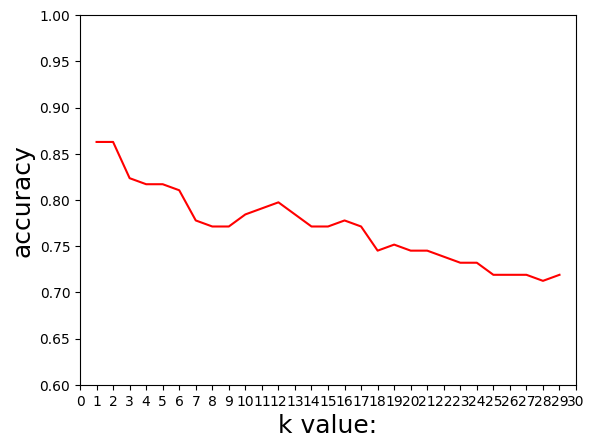

In [23]:
    plt.xlabel('k value:',fontsize=18)
    plt.ylabel('accuracy',fontsize=18)
    x_major_locator = plt.MultipleLocator(1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    plt.xlim(0, 30)
    plt.ylim(0.6, 1)
    plt.plot(range(1,30),scores,'r')
    plt.show()